# (Imai and Kim, 2019) When Should We Use Unit Fixed Effects Regression Models for Causal Inference with Longitudinal Data?

[Link to Paper](https://imai.fas.harvard.edu/research/files/FEmatch.pdf)

This is a paper that I have referenced numerous times at work. Imai and Kim discuss how Fixed Effects is a popular panel method in causal inference due to its ability to control for unobserved time-invariant confounders. However, they note that fixed effects is also often misused. They discuss fixed effects from the perspective of potential outcomes as well as a graphical framework (DAGs) to do several things:
1. relax the linearity assumption in (linear) fixed effects
2. discuss the trade-offs in assumption an analyst must make to achieve identifiability, something that is often overlooked by fixed effects practitioners (For instance, the ability to adjust for unobserved time-invariant confounders comes at the expense of dynamic causal relationships between treatment and outcome variables)

## Causal Identification Assumptions

### The Linear Unit Fixed Effects Regression Model

Throughout the text, for simplicity we assume a *balanced* longitudinal dataset of $N$ units and $T$ time periods with no missing data, although the methods and implementations do not require this.

We also assume a simple random sampling of units from a population with $T$ fixed.

For each unit $i$ at time $t$, we observe:
- outcome variable $Y_{it}$
- binary treatment variable $X_{it}\in\{0,1\}$

The most basic linear regression model with unit fixed effects:

$$Y_{it}=\alpha_i+\beta X_{it}+\epsilon_{it}$$

where
- $\alpha_i$ is fixed but unknown intercept for unit $i$
- $\epsilon_{it}$ is a disturbance term for unit $i$ at time $t$ with $E(\epsilon_{it})=0$

$\alpha_i$ captures a vector of unobserved time-invariant confounders in a flexible manner, or in other words,
$$\alpha_i=h(\mathbb{U}_i)$$

where:
- $\mathbb{U}_i$: a vector of unobserved time-invariant confounders
- $h(\cdot)$: arbitrary and unknown function

Typically, the assumption of strict exogeneity of the disturbance term $\epsilon_{it}$ is rquired to identify $\beta$ as causal, which can be written as
$$E(\epsilon_{it}|\mathbb{X}_i,\alpha_i)=0$$

where:
- $\mathbb{X}_i$ is a $T\times 1$ vector of treatment variables for unit $i$

This model is referred to as LIN-FE. The parameter estimate of $\beta$ can be estimated unbiasedly using least squares if the data is generated according to the above.

The parameter $\beta$ is interpreted as the *average contemporaneous effect* of $X_{it}$ on $Y_{it}$.

Using the potential outcome framework, the causal estimand of LIN-FE can be the following average treatment effect:

$$\tau=E[Y_{it}(1)-Y_{it}(0)|C_i=1]$$

where $C_i=I_{0< \{\sum_{t=1}^{T}X_{it}\} <T}$. This indicator variable means that if a user is always the same treatment (as in, they never flip), then they do not contribute to the estimation.

Under LIN-FE, $\beta=\tau$ because of the assumed linearity for potential outcomes.



### Nonparametric Causal Identification Analysis

In a nonparametric identification of fixed effects, we:
1. relax the linearity assumption of LIN-FE
2. generalize mean independence of $\epsilon_{it}$ to statistical independence

**Assumption 1 (Nonparametric Fixed Effects Model - NP-FE)**:

For each $i=1,2,...,N$ and $t=1,2,...,T$,

$$Y_{it}=g(X_{it},\mathbb{U}_i,\epsilon_{it})$$

and

$$\epsilon_{it}\perp\{\mathbb{X}_i,\mathbb{U_i}\}$$

where $g(\cdot)$ can be any function.

We can examine NP-FE using DAGs. Pearl (2009) shows that a DAG can formally represent a nonparametric SEM. The figure below is the NPSEM that corresponds to NP-FE.

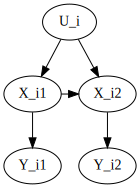

In [17]:
# @title Figure 1
# prompt: create and plot a DAG using the python package graphviz that
# represents the following:
## Y_{i1}=f(X_{it},U_i)
## Y_{i2}=f(X_{i2},U_i)
## X_{i1}=f(U_i)
## X_{i2}=f(X_{i1},U_i)

import graphviz as gv
# create a directed acyclic graph (DAG)
G = gv.Digraph('G', format='pdf')
# add nodes
G.node('Y1', 'Y_i1')
G.node('Y2', 'Y_i2')
G.node('X1', 'X_i1')
G.node('X2', 'X_i2')
G.node('U', 'U_i')
# add edges
G.edge('X1', 'Y1')
G.edge('X2', 'Y2')
G.edge('X1','X2',constraint='False')
G.edge('U', 'X1')
G.edge('U', 'X2')
# render the graph
G.render('my_graph')
G


Note that there are only 2 time periods here but that is simply for convenience purposes.

The DAG above shows that Assumption 1 of NP-FE can be understood as the following set of statsments:
- Assumption (a): No unobserved time-*varying* confounders
- Assumption (b): Past outcomes do not directly affect current outcome
- Assumption (c): Past outcomes do not directly affect current treatment
- Assumption (d): Past treatments do not directly affect current outcome

No additional arrows can be added without making it inconsistent with NP-FE. (In particular, no additional arrows that point to $X_{it}$ can be included in the DAG without violating the strict exogeneity assumption of $\epsilon_{it}$ under NP-FE.

Next we adopt the potential outcomes framework. DAGs illuminate the entire causal structure and potential outcomes clarifies the assumptions about treatment assignment mechanisms.

Note how in the equations above, the equations for FE included the contemporaneous values of treatment but not its past values, implying that past treatments do not directly affect current outcome. We call this restriction the assumption of *no carryover effect*, and corresponds to Assumption (d) above.

**Assumption 2 (No carryover effect)**:

For each $i=1,2,...,N$ and $t=1,2,...,T$, the potential outcome is given by
$$Y_{it}(X_{it},X_{i2},...,X_{i,t-1},X_{it})=Y_{it}(X_{it})$$

Next, this assumption corresponds to assumptions (a) and (c) of the NP-FE model

**Assumption 3 (Sequential Ignorability with Unobserved Time-Invariant Confounders)**:

For each $i=1,2,...,N$,
$$\begin{align}\{Y_{it}(1),Y_{it}(0)\}_{t=1}^{T}&\perp X_{i1}|\mathbb{U}_i\\&\vdots\\\{Y_{it}(1),Y_{it}(0)\}_{t=1}^{T}&\perp X_{it'}|X_{i1},...,X_{i,t'-1}\mathbb{U}_i\\&\vdots\\\{Y_{it}(1),Y_{it}(0)\}_{t=1}^{T}&\perp X_{it}|X_{i1},...,X_{i,T-1}\mathbb{U}_i\end{align}$$

In other words, there is ignorability with time-varying confounders conditional on its past realizations

### Which Causal Identification Assumptions Can Be Relaxed?

Since Assumption (a) is difficult to relax in FE models, we will focus on what other assumptions can be relaxed (Assumptions b,c, or d?)

Assumption (b), Past outcomes do not directly affect current outcome, can be relaxed without compromising causal identification. This is because based on Figure 1, past outcomes confounding effect is already blocked when we condition on past treatments and unobserved time-invariant confounders.

Regarding Assumption (d), past treatments directly affecting current outcome, is sometimes addressed by including lagged treatment variables in LIN-FE, for instance,

$$Y_{it}=\alpha_i+\beta_1X_{it}+\beta_2X_{i,t-1}+\epsilon_{it}$$

This implies that the potential outcome can be written as a function of the contemporaneous and previous treatments ($Y_{it}(X_{i,t-1},X_{it})$) rather than the contemporaneous treatment alone, partially relaxing Assumption 2.

This can be visualized in the below DAG

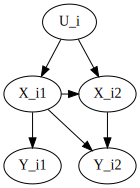

In [20]:
# @title Figure 2b - past treatments affect current outcome

import graphviz as gv
# create a directed acyclic graph (DAG)
G = gv.Digraph('G', format='pdf')
# add nodes
G.node('Y1', 'Y_i1')
G.node('Y2', 'Y_i2')
G.node('X1', 'X_i1')
G.node('X2', 'X_i2')
G.node('U', 'U_i')
# add edges
G.edge('X1', 'Y1')
G.edge('X2', 'Y2')
G.edge('X1','X2',constraint='False')
G.edge('U', 'X1')
G.edge('X1','Y2',constraint='False')
G.edge('U', 'X2')
# render the graph
G.render('my_graph')
G


This DAG is a modification of NP-FE,

$$Y_{it}=g(X_{i1},...,X_{it},\mathbb{U}_i,\epsilon_{it})$$

It can be shown that under this NPSEM, Assumption 3 of Sequential Ignorability still holds. Although a difference is that past treatments must be controlled for otherwise past treatment is a confounder. However in practice, researchers assume that only a small number of past treatments matter, because otherwise it is generally not possible to nonparametrically adjust for all past treatments.

Finally, we consider relaxing the assumption that past outcomes do not directly affect current treatment (assumption (c)), and can be shown below:



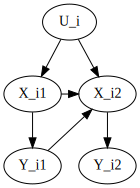

In [23]:
# @title Figure 2c - past outcomes affect current treatment
# prompt: create and plot a DAG using the python package graphviz that
# represents the following:
## Y_{i1}=f(X_{it},U_i)
## Y_{i2}=f(X_{i2},U_i)
## X_{i1}=f(U_i)
## X_{i2}=f(X_{i1},U_i)

import graphviz as gv
# create a directed acyclic graph (DAG)
G = gv.Digraph('G', format='pdf')
# add nodes
G.node('Y1', 'Y_i1')
G.node('Y2', 'Y_i2')
G.node('X1', 'X_i1')
G.node('X2', 'X_i2')
G.node('U', 'U_i')
# add edges
G.edge('X1', 'Y1')
G.edge('X2', 'Y2')
G.edge('X1','X2',constraint='False')
G.edge('U', 'X1')
G.edge('Y1','X2',constraint='False')
G.edge('U', 'X2')
# render the graph
G.render('my_graph')
G


We see that assumption 3 of sequential ignorability is violated because the existence of causal relationships between past outcomes and current treatment implies a correlation between past disturbance terms and current treatment. This can partially be relaxed using an instrumental variables approach.

To summarize, there are 3 key assumptions (Assumptions 1,2,3 above). The first one of no unobserved time-varying confounders is well-understood. The other two is underappreciated. In addition, the 2 underappreciated assumptions can be relaxed with a method such as Marginal Structural Models. However, for MSM's, they do not possess the ability to control for unobserved time-invariant confounders.

Therefore, a key decision for applied researchers is then whether, in a given substantive problem, they believe causal dynamics is more important than time-invariant unobserved confounders.

### Adjusting for Observed Time-Varying Confounders

Finally, we consider the adjustment of observed time-varying confounders under fixed effects.

Since fixed effects can only adjust for unobserved time-*invariant* confounders, applied researchers often measure a vector of observed time-varying confounders $\mathbb{Z}_{it}$ to improve the credibility of assumptions.

The main conclusion of the above identification analysis remains unchanged even if we include these additional observed time-varying confounders as covariates. However, we must make an additional assumption tha there exists no dynamic causal relationships between outcome and these time-varying confounders

**Assumption 4: (Nonparametric Fixed Effects Model with Observed Time-Varying Confounders)**

For each $i=1,2,...,N$ and $t=1,2,...,T$,
$$Y_{it}=g(X_{i1},...,X_{it},\mathbb{U}_i,Z_{i1},...,Z_{it},\epsilon_{it})$$

and

$$\epsilon_{it}\perp\{\mathbb{X}_i,\mathbb{Z}_i\mathbb{U}_i\}$$

where $\mathbb{Z}_i=(\mathbb{Z}_{i1},\mathbb{Z}_{i2},...,\mathbb{Z}_{it})$

While time-varying confounder control introduce some flexibility in the ability to control for these time-varying variables, the issue is that we cannot allow $Z_{it}$ to affect both current and future outcomes. In addition, the average contemporaneous effect of $X_{it}$ on $Y_{it}$ becomes unidentifiable if the outcome $Y_{it}$ affects future treatments either directly or indirectly through $\mathbb{Z}_{it'}$ where $t'>t$. Of-course, this may not be reasonable in many scenarios because we often expect feedback effects to occur over time between outcome and treatment.

Therefore, researchers face the same key trade-off regardless of whether time-varying confounders are present. To adjust for unobserved time-invariant confounders, researchers must assume the absense of dynamic causal relationships among the outcome, treatment, and observed time-varying confounders. In contrast, the selection-on-observables approach can relax these assumptions so long as there are no unobserved time-invariant confounders.